In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv('train_storming_round.csv',parse_dates=['year_month','agent_join_month'])

In [5]:
pd.set_option('display.max_columns',85)
pd.set_option('display.max_rows',85)
data.set_index('row_id',inplace=True)

In [6]:
data.head()

agent_code  agent_age agent_join_month first_policy_sold_month  \
row_id                                                                  
1        455ca878         45       2021-02-01                9/1/2023   
2        c823ce77         48       2022-04-01                2/1/2024   
3        62154055         53       2020-05-01                9/1/2023   
4        c58bfa6e         44       2019-07-01                3/1/2022   
5        b1e5f770         20       2020-09-01                2/1/2023   

       year_month  unique_proposals_last_7_days  \
row_id                                            
1      2023-01-01                             3   
2      2023-01-01                             1   
3      2023-01-01                             3   
4      2023-01-01                             1   
5      2023-01-01                             0   

        unique_proposals_last_15_days  unique_proposals_last_21_days  \
row_id                                                                 
1                                   6                              2   
2                                   4                             12   
3                                   5                              5   
4                                   0                             12   
5                                   6                             10   

        unique_proposal  unique_quotations_last_7_days  \
row_id                                                   
1                    12                              3   
2                    21                              3   
3                    17                              1   
4                    17                              1   
5                    17                              3   

        unique_quotations_last_15_days  unique_quotations_last_21_days  \
row_id                                                                   
1                                    0                               4   
2                                    1                               8   
3                                    6                               5   
4                                    1                               5   
5                                    6                               2   

        unique_quotations  unique_customers_last_7_days  \
row_id                                                    
1                       9                             3   
2                      14                             4   
3                      14                             3   
4                      11                             2   
5                      13                             3   

        unique_customers_last_15_days  unique_customers_last_21_days  \
row_id                                                                 
1                                   4                              8   
2                                   3                             10   
3                                   7                             11   
4                                   2                              9   
5                                  10                              6   

        unique_customers  new_policy_count  ANBP_value  net_income  \
row_id                                                               
1                     15                 0           0       93313   
2                     17                25     1071450      164804   
3                     21                26     1601210      426690   
4                     13                18      283230       47793   
5                     19                20     1957680      562239   

        number_of_policy_holders  number_of_cash_payment_policies  
row_id                                                             
1                             30                              162  
2                              0                              175  
3                       

In [7]:
data.shape

(15308, 22)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15308 entries, 1 to 15308
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   agent_code                       15308 non-null  object        
 1   agent_age                        15308 non-null  int64         
 2   agent_join_month                 15308 non-null  datetime64[ns]
 3   first_policy_sold_month          15308 non-null  object        
 4   year_month                       15308 non-null  datetime64[ns]
 5   unique_proposals_last_7_days     15308 non-null  int64         
 6   unique_proposals_last_15_days    15308 non-null  int64         
 7   unique_proposals_last_21_days    15308 non-null  int64         
 8   unique_proposal                  15308 non-null  int64         
 9   unique_quotations_last_7_days    15308 non-null  int64         
 10  unique_quotations_last_15_days   15308 non-null  int64         

In [9]:
data.describe()

agent_age               agent_join_month  \
count  15308.000000                          15308   
mean      40.585772  2021-05-23 01:43:05.941991168   
min       20.000000            2019-04-01 00:00:00   
25%       31.000000            2020-03-01 00:00:00   
50%       41.000000            2021-05-01 00:00:00   
75%       51.000000            2022-07-01 00:00:00   
max       60.000000            2024-07-01 00:00:00   
std       11.688204                            NaN   

                          year_month  unique_proposals_last_7_days  \
count                          15308                  15308.000000   
mean   2023-11-03 05:31:24.191272704                      1.491246   
min              2023-01-01 00:00:00                      0.000000   
25%              2023-06-01 00:00:00                      0.000000   
50%              2023-11-01 00:00:00                      1.000000   
75%              2024-04-01 00:00:00                      2.000000   
max              2024-08-01 00:00:00                      3.000000   
std                              NaN                      1.119554   

       unique_proposals_last_15_days  unique_proposals_last_21_days  \
count                   15308.000000                   15308.000000   
mean                        2.991116                      10.045728   
min                         0.000000                       0.000000   
25%                         1.000000                       5.000000   
50%                         3.000000                      10.000000   
75%                         5.000000                      15.000000   
max                         6.000000                      20.000000   
std                         2.001613                       6.037296   

       unique_proposal  unique_quotations_last_7_days  \
count     15308.000000                   15308.000000   
mean         17.516527                       1.989679   
min           1.000000                       0.000000   
25%          12.000000                       1.000000   
50%          17.000000                       2.000000   
75%          23.000000                       3.000000   
max          34.000000                       4.000000   
std           6.616954                       1.420996   

       unique_quotations_last_15_days  unique_quotations_last_21_days  \
count                    15308.000000                    15308.000000   
mean                         2.996538                        4.469624   
min                          0.000000                        0.000000   
25%                          1.000000                        2.000000   
50%                          3.000000                        4.000000   
75%                          5.000000                        7.000000   
max                          6.000000                        9.000000   
std                          2.004386                        2.875329   

       unique_quotations  unique_customers_last_7_days  \
count       15308.000000                  15308.000000   
mean           13.922394                      2.995493   
min             1.000000                      0.000000   
25%            11.000000                      2.000000   
50%            14.000000                      3.000000   
75%            17.000000                      4.000000   
max            32.000000                      6.000000   
std             4.663777                      1.644117   

       unique_customers_last_15_days  unique_customers_last_21_days  \
count                   15308.000000                   15308.000000   
mean                        4.997714                       7.500523   
min                         0.000000                       0.000000   
25%                         3.000000                       5.000000   
50%                         5.000000                       8.000000   
75%                         7.000000                      10.000000   
max                        10.000000                      15

In [10]:
data[['agent_age','new_policy_count','ANBP_value','unique_proposal','net_income','unique_quotations', 'unique_customers','number_of_policy_holders','number_of_cash_payment_policies']].sample(5)

agent_age  new_policy_count  ANBP_value  unique_proposal  net_income  \
row_id                                                                         
2870           28                24      521184               16       84635   
11633          33                35     3009125               30      789920   
8952           26                30      958530               21      221031   
13287          35                25       39325               20        5375   
12199          52                23     1884505               15      303666   

        unique_quotations  unique_customers  number_of_policy_holders  \
row_id                                                                  
2870                    8                13                        26   
11633                  16                14                        28   
8952                   16                22                        66   
13287                  11                17                        68   
12199                   9                12                        48   

        number_of_cash_payment_policies  
row_id                                   
2870                                192  
11633                               175  
8952                                  0  
13287                               100  
12199                                69

In [11]:
data[['agent_age','new_policy_count','ANBP_value','unique_proposal','net_income','unique_quotations', 'unique_customers','number_of_policy_holders','number_of_cash_payment_policies']].describe()

agent_age  new_policy_count    ANBP_value  unique_proposal  \
count  15308.000000      15308.000000  1.530800e+04     15308.000000   
mean      40.585772         20.269990  1.025338e+06        17.516527   
std       11.688204          9.541693  8.054989e+05         6.616954   
min       20.000000          0.000000  0.000000e+00         1.000000   
25%       31.000000         15.000000  3.473238e+05        12.000000   
50%       41.000000         21.000000  9.031445e+05        17.000000   
75%       51.000000         27.000000  1.560700e+06        23.000000   
max       60.000000         42.000000  3.933840e+06        34.000000   

         net_income  unique_quotations  unique_customers  \
count  1.530800e+04       15308.000000      15308.000000   
mean   2.280414e+05          13.922394         15.493729   
std    1.736671e+05           4.663777          4.542321   
min    1.160000e+03           1.000000          1.000000   
25%    9.282500e+04          11.000000         12.000000   
50%    1.899740e+05          14.000000         15.000000   
75%    3.217448e+05          17.000000         19.000000   
max    1.140237e+06          32.000000         31.000000   

       number_of_policy_holders  number_of_cash_payment_policies  
count              15308.000000                     15308.000000  
mean                  30.968317                       101.180886  
std                   24.621933                        75.323464  
min                    0.000000                         0.000000  
25%                   12.000000                        38.000000  
50%                   28.000000                        90.000000  
75%                   48.000000                       152.000000  
max                  116.000000                       378.000000

In [12]:
data.isnull().sum()

agent_code                         0
agent_age                          0
agent_join_month                   0
first_policy_sold_month            0
year_month                         0
unique_proposals_last_7_days       0
unique_proposals_last_15_days      0
unique_proposals_last_21_days      0
unique_proposal                    0
unique_quotations_last_7_days      0
unique_quotations_last_15_days     0
unique_quotations_last_21_days     0
unique_quotations                  0
unique_customers_last_7_days       0
unique_customers_last_15_days      0
unique_customers_last_21_days      0
unique_customers                   0
new_policy_count                   0
ANBP_value                         0
net_income                         0
number_of_policy_holders           0
number_of_cash_payment_policies    0
dtype: int64

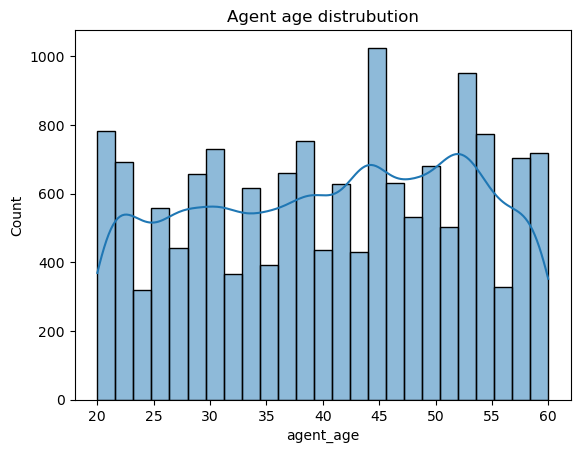

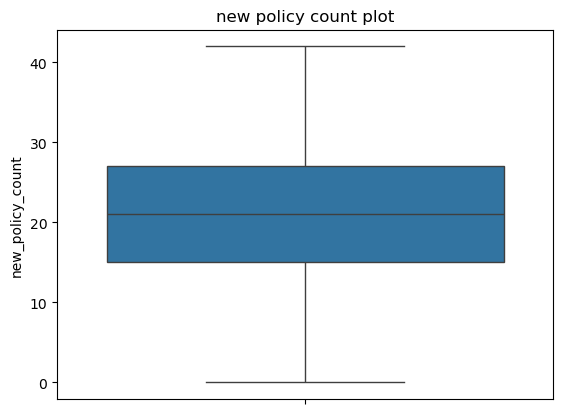

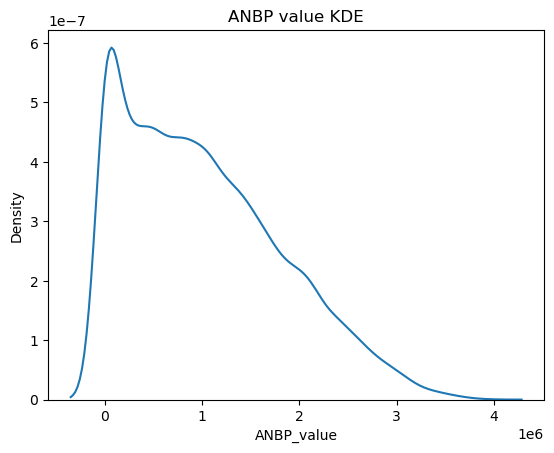

In [13]:
sns.histplot(data['agent_age'],kde=True)
plt.title('Agent age distrubution')
plt.show()

sns.boxplot(data['new_policy_count'])
plt.title('new policy count plot')
plt.show()

sns.kdeplot(data['ANBP_value'])
plt.title('ANBP value KDE')
plt.show()

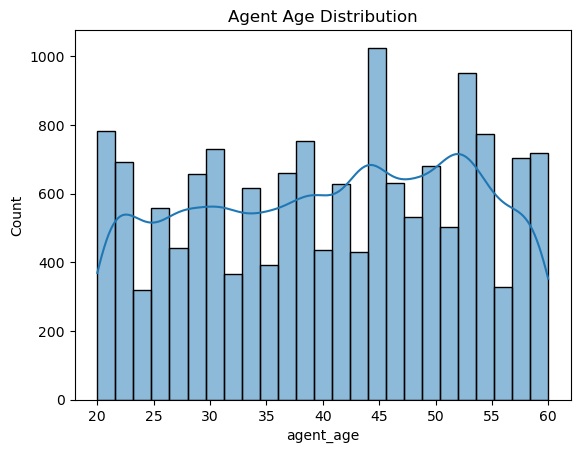

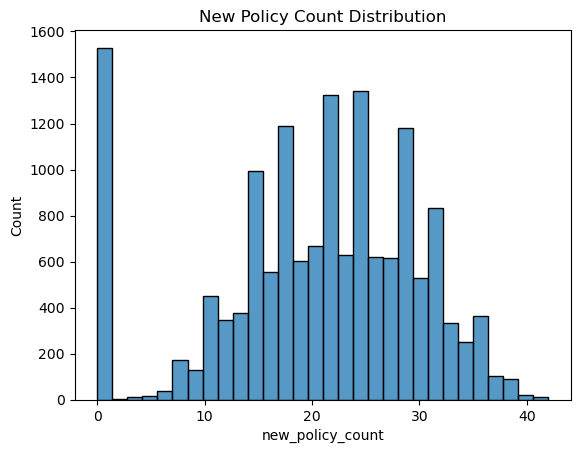

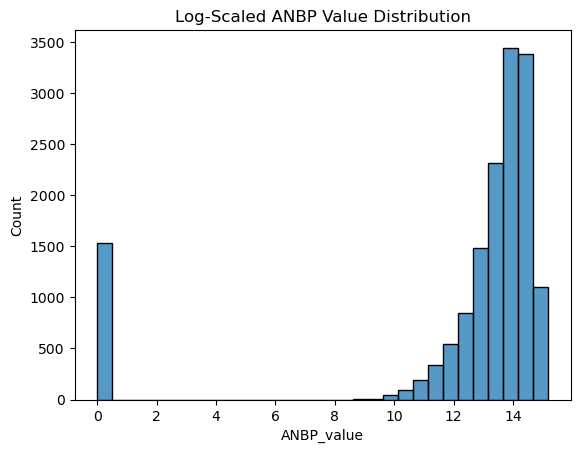

In [14]:
# Summary
data.describe()

# Distribution of age
sns.histplot(data['agent_age'], kde=True)
plt.title("Agent Age Distribution")
plt.show()

# Distribution of new policy counts
sns.histplot(data['new_policy_count'], bins=30)
plt.title("New Policy Count Distribution")
plt.show()

# Distribution of ANBP_value (log scale for skew)
sns.histplot(np.log1p(data['ANBP_value']), bins=30)
plt.title("Log-Scaled ANBP Value Distribution")
plt.show()


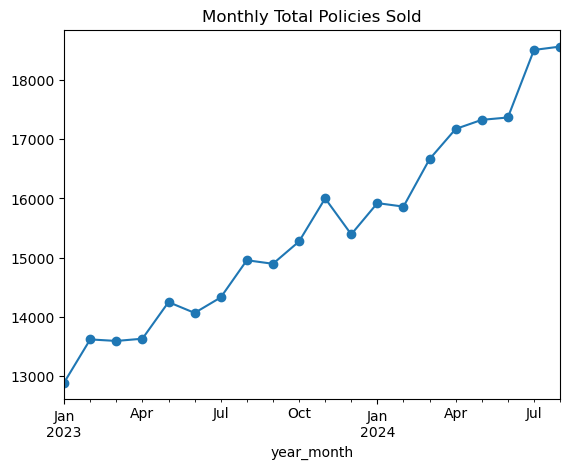

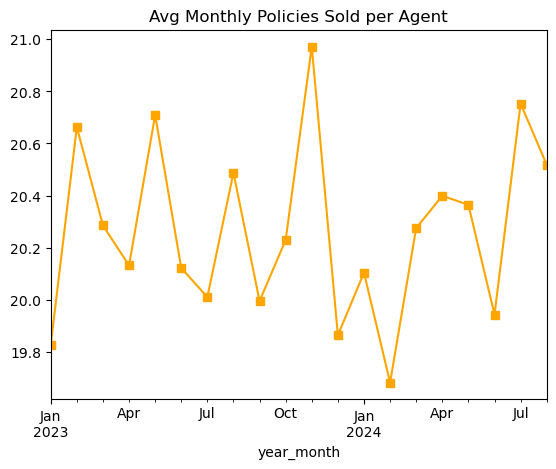

In [15]:
# Convert year_month to datetime
data['year_month'] = pd.to_datetime(data['year_month'])

# Monthly total policies sold
monthly_policy_sales = data.groupby('year_month')['new_policy_count'].sum()
monthly_policy_sales.plot(marker='o')
plt.title("Monthly Total Policies Sold")
plt.show()

# Average policies sold per agent
avg_sales = data.groupby('year_month')['new_policy_count'].mean()
avg_sales.plot(marker='s', color='orange')
plt.title("Avg Monthly Policies Sold per Agent")
plt.show()


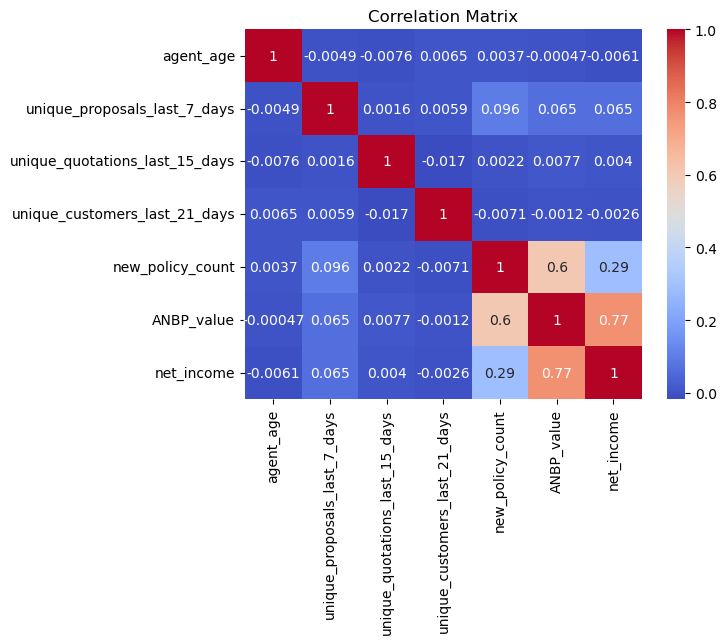

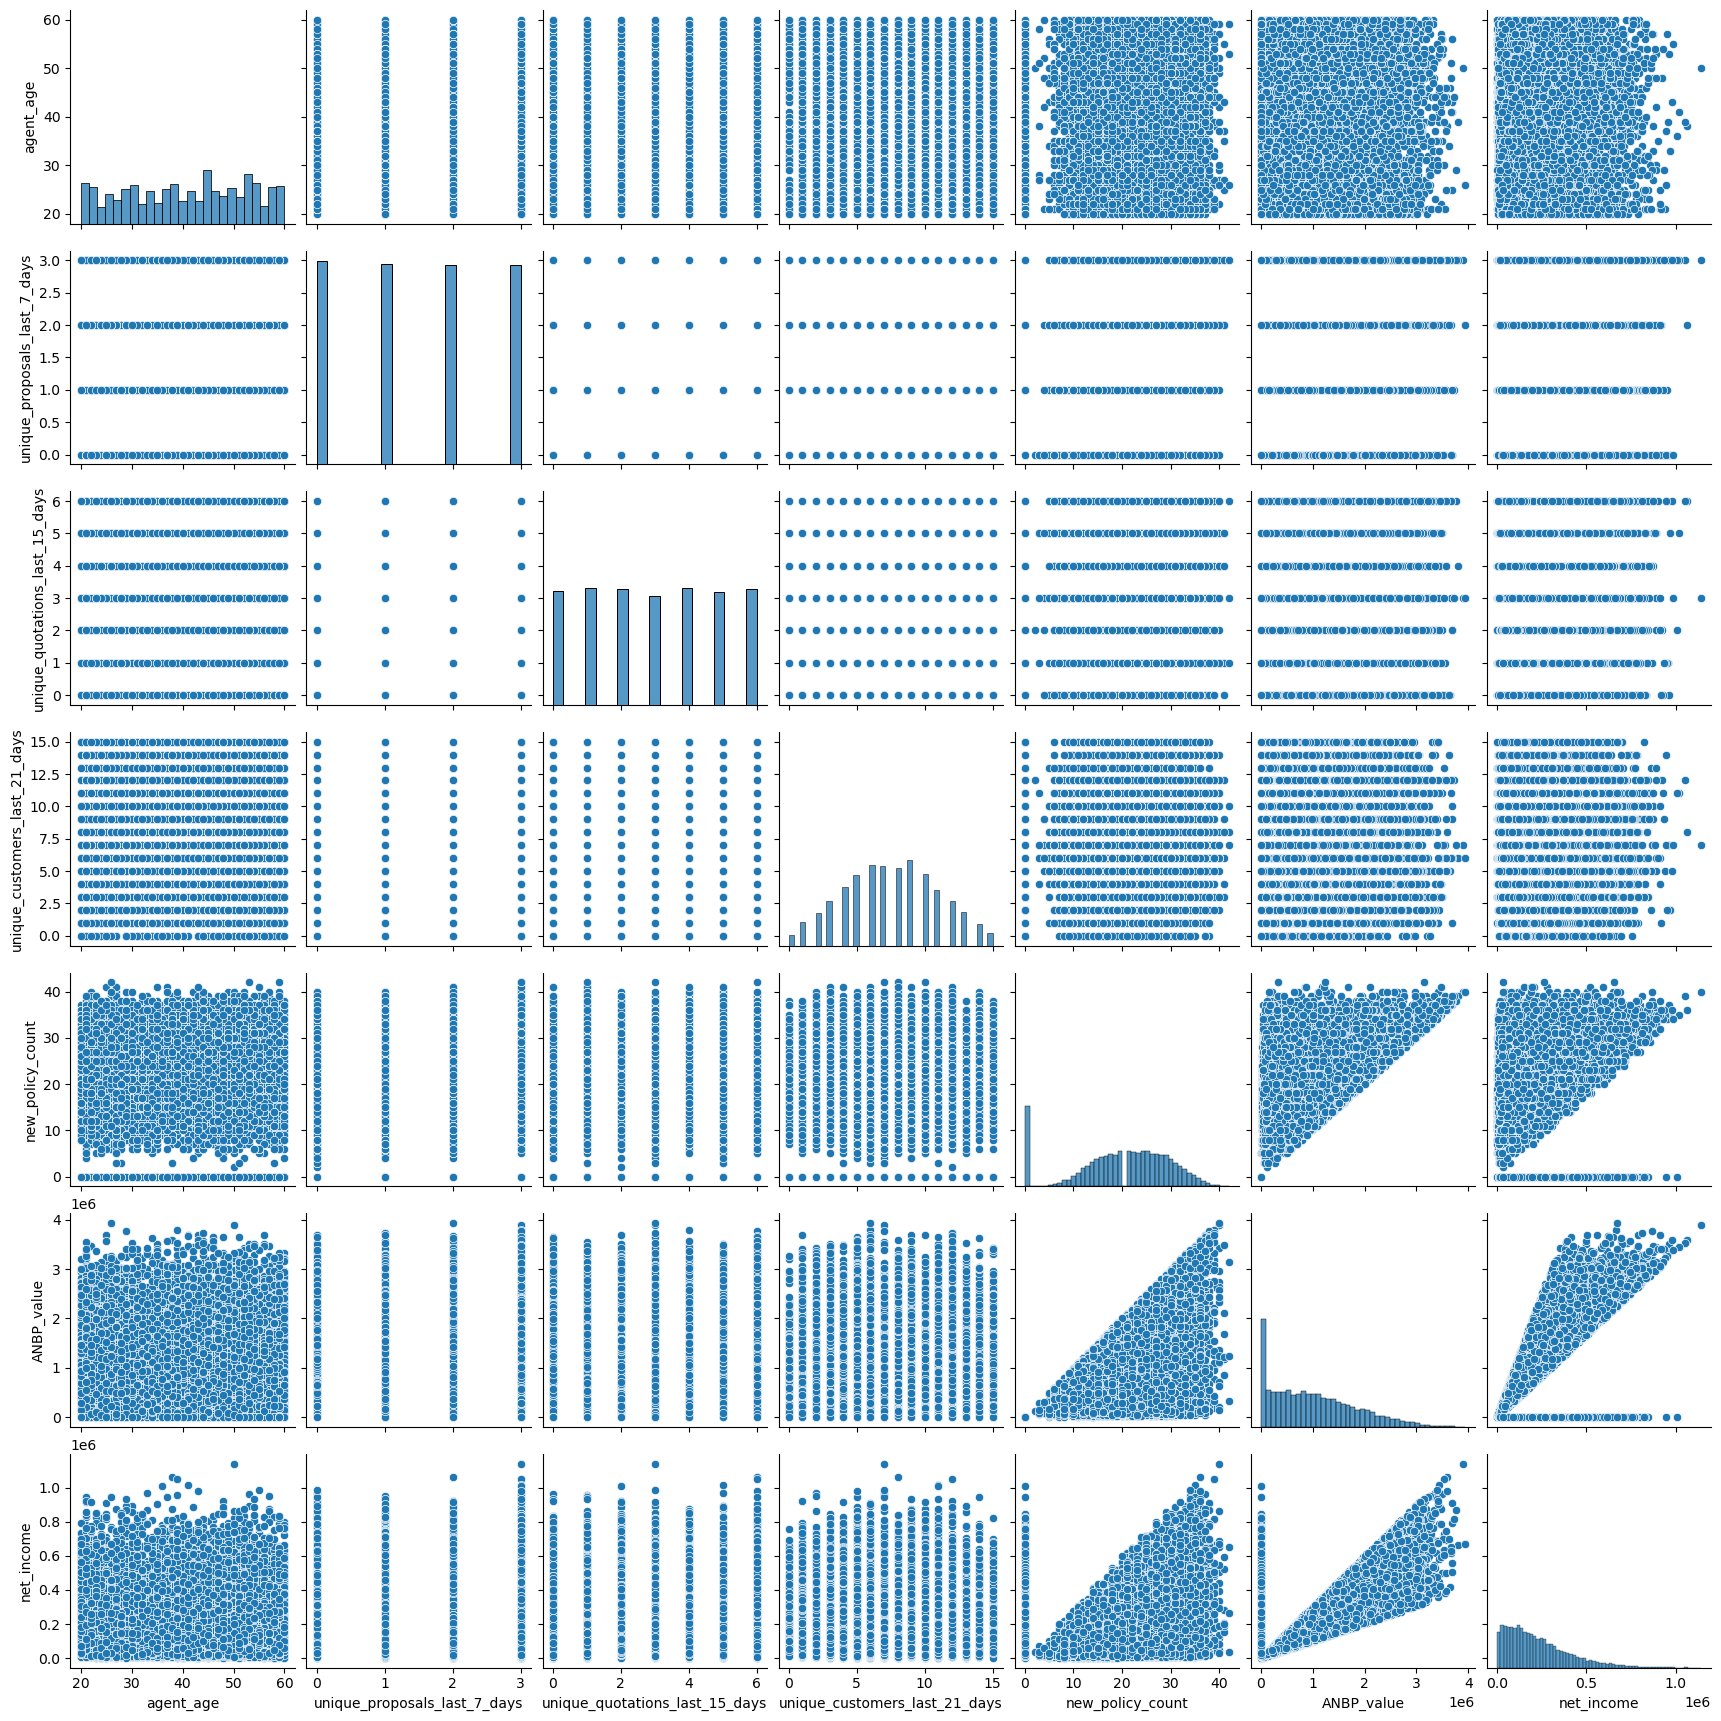

In [16]:
# Correlation
corr_cols = ['agent_age', 'unique_proposals_last_7_days', 'unique_quotations_last_15_days',
             'unique_customers_last_21_days', 'new_policy_count', 'ANBP_value', 'net_income']
sns.heatmap(data[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Pairplot
sns.pairplot(data[corr_cols])
plt.show()


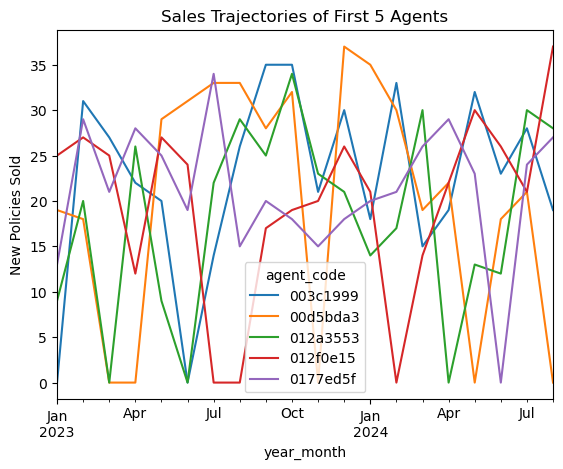

In [17]:
# Agent monthly pivot
pivot = data.pivot_table(index='year_month', columns='agent_code', values='new_policy_count', aggfunc='sum')
pivot.iloc[:, :5].plot()
plt.title("Sales Trajectories of First 5 Agents")
plt.ylabel("New Policies Sold")
plt.show()


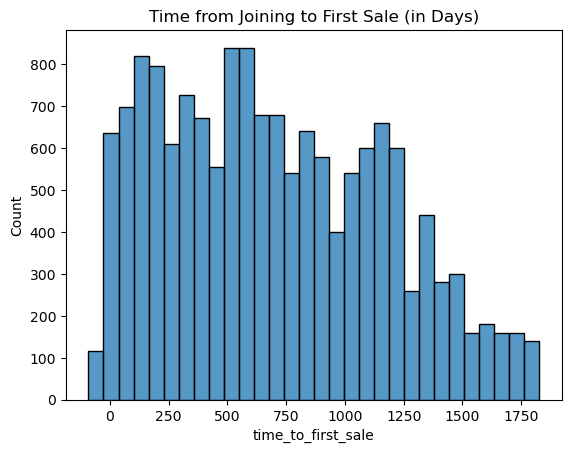

In [18]:
#Time-to-First-Sale
data['agent_join_month'] = pd.to_datetime(data['agent_join_month'])
data['first_policy_sold_month'] = pd.to_datetime(data['first_policy_sold_month'])
data['time_to_first_sale'] = (data['first_policy_sold_month'] - data['agent_join_month']).dt.days

sns.histplot(data['time_to_first_sale'], bins=30)
plt.title("Time from Joining to First Sale (in Days)")
plt.show()


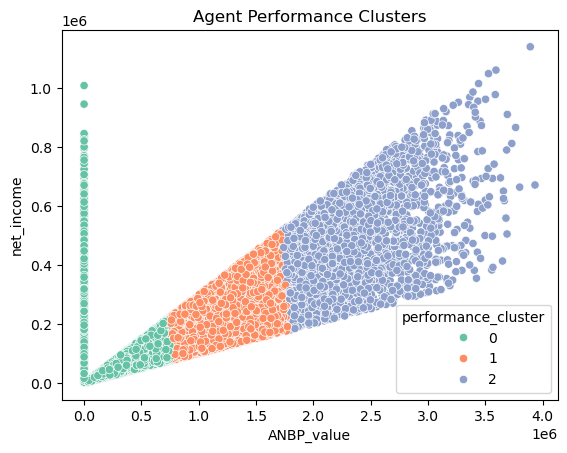

In [19]:
#Performance Clustering (Bonus)
from sklearn.cluster import KMeans

features = data[['new_policy_count', 'ANBP_value', 'net_income']]
kmeans = KMeans(n_clusters=3, random_state=0).fit(features)
data['performance_cluster'] = kmeans.labels_

sns.scatterplot(data=data, x='ANBP_value', y='net_income', hue='performance_cluster', palette='Set2')
plt.title("Agent Performance Clusters")
plt.show()


In [20]:
data['agent_code'].nunique()

905

In [21]:
print(data['agent_code'].nunique())

905


In [22]:
data[['agent_code','agent_join_month','first_policy_sold_month']].head()

agent_code agent_join_month first_policy_sold_month
row_id                                                    
1        455ca878       2021-02-01              2023-09-01
2        c823ce77       2022-04-01              2024-02-01
3        62154055       2020-05-01              2023-09-01
4        c58bfa6e       2019-07-01              2022-03-01
5        b1e5f770       2020-09-01              2023-02-01

In [23]:
data[['agent_code','agent_join_month','first_policy_sold_month']].describe()

agent_join_month        first_policy_sold_month
count                          15308                          15308
mean   2021-05-23 01:43:05.941991168  2023-04-24 01:41:52.568591616
min              2019-04-01 00:00:00            2022-01-01 00:00:00
25%              2020-03-01 00:00:00            2022-10-01 00:00:00
50%              2021-05-01 00:00:00            2023-06-01 00:00:00
75%              2022-07-01 00:00:00            2023-12-01 00:00:00
max              2024-07-01 00:00:00            2024-04-01 00:00:00

In [24]:
data['agent_join_month'].value_counts()

agent_join_month
2019-05-01    520
2019-11-01    500
2019-04-01    400
2020-03-01    380
2021-12-01    360
2022-09-01    360
2020-05-01    360
2022-03-01    360
2021-11-01    360
2022-04-01    340
2019-08-01    340
2022-02-01    340
2021-02-01    340
2021-03-01    340
2021-05-01    340
2020-11-01    320
2020-04-01    320
2020-06-01    320
2019-10-01    320
2021-09-01    300
2021-01-01    300
2022-01-01    300
2022-12-01    300
2019-12-01    300
2020-08-01    280
2022-07-01    280
2022-11-01    280
2019-06-01    280
2019-07-01    280
2022-05-01    260
2020-12-01    260
2021-04-01    260
2020-02-01    240
2020-07-01    240
2023-06-01    238
2021-08-01    220
2022-08-01    200
2020-10-01    200
2023-02-01    198
2023-07-01    182
2020-09-01    180
2019-09-01    180
2021-07-01    180
2023-08-01    180
2023-04-01    176
2023-01-01    171
2023-05-01    165
2021-10-01    160
2021-06-01    160
2022-10-01    160
2022-06-01    160
2023-12-01    136
2020-01-01    120
2023-03-01    119
2023-09-01 

In [25]:
data['agent_join_month'].value_counts(normalize=True) * 100

agent_join_month
2019-05-01    3.396917
2019-11-01    3.266266
2019-04-01    2.613013
2020-03-01    2.482362
2021-12-01    2.351712
2022-09-01    2.351712
2020-05-01    2.351712
2022-03-01    2.351712
2021-11-01    2.351712
2022-04-01    2.221061
2019-08-01    2.221061
2022-02-01    2.221061
2021-02-01    2.221061
2021-03-01    2.221061
2021-05-01    2.221061
2020-11-01    2.090410
2020-04-01    2.090410
2020-06-01    2.090410
2019-10-01    2.090410
2021-09-01    1.959760
2021-01-01    1.959760
2022-01-01    1.959760
2022-12-01    1.959760
2019-12-01    1.959760
2020-08-01    1.829109
2022-07-01    1.829109
2022-11-01    1.829109
2019-06-01    1.829109
2019-07-01    1.829109
2022-05-01    1.698458
2020-12-01    1.698458
2021-04-01    1.698458
2020-02-01    1.567808
2020-07-01    1.567808
2023-06-01    1.554743
2021-08-01    1.437157
2022-08-01    1.306506
2020-10-01    1.306506
2023-02-01    1.293441
2023-07-01    1.188921
2020-09-01    1.175856
2019-09-01    1.175856
2021-07-01    1.1

In [26]:
data[['year_month']]

year_month
row_id           
1      2023-01-01
2      2023-01-01
3      2023-01-01
4      2023-01-01
5      2023-01-01
...           ...
15304  2024-08-01
15305  2024-08-01
15306  2024-08-01
15307  2024-08-01
15308  2024-08-01

[15308 rows x 1 columns]

In [27]:
data['agent_join_month'] = pd.to_datetime(data['agent_join_month'])
# Extract just the month name
data['agent_join_month_name'] = data['agent_join_month'].dt.strftime('%B')
agent_join_month_counts = data['agent_join_month_name'].value_counts()
print(agent_join_month_counts.to_string())
# data.info()

agent_join_month_name
May          1705
November     1568
April        1532
December     1356
March        1299
August       1220
February     1214
June         1200
July         1175
September    1130
January       989
October       920


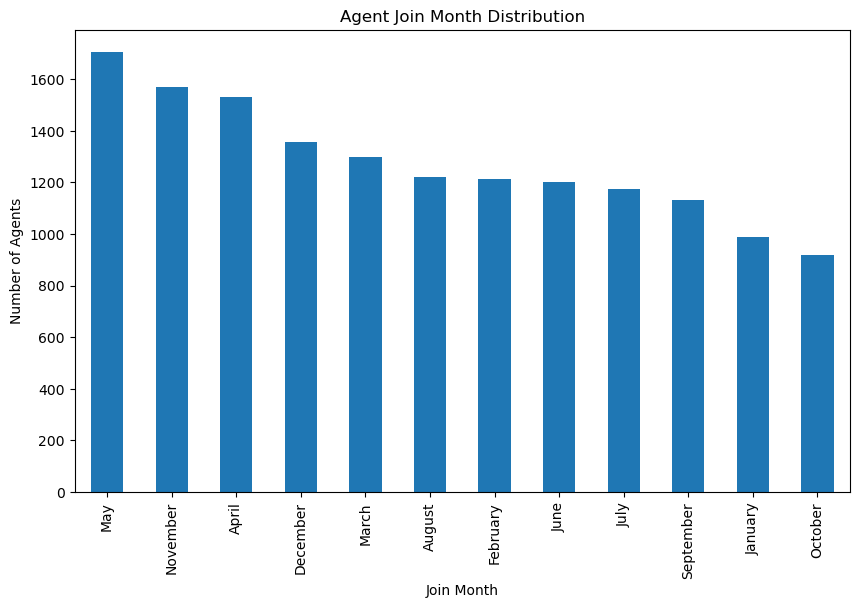

In [28]:
agent_join_month_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Agent Join Month Distribution')
plt.xlabel('Join Month')
plt.ylabel('Number of Agents')
plt.show()

In [29]:
monthly_summary = data.groupby('year_month').agg({
      'new_policy_count': 'sum',
      'ANBP_value': 'sum',
      'agent_code': 'nunique'  # 'nunique' gives the number of unique agents
  })
monthly_summary 
  # print(monthly_summary)
  # print(type(monthly_summary)) # To see the type of the result

new_policy_count  ANBP_value  agent_code
year_month                                          
2023-01-01             12887   661715315         650
2023-02-01             13617   667126713         659
2023-03-01             13591   680989857         670
2023-04-01             13629   690631468         677
2023-05-01             14248   728238374         688
2023-06-01             14065   705247082         699
2023-07-01             14327   702103080         716
2023-08-01             14956   748374125         730
2023-09-01             14896   751581124         745
2023-10-01             15273   780970219         755
2023-11-01             16002   796923364         763
2023-12-01             15394   753175314         775
2024-01-01             15922   822183802         792
2024-02-01             15863   801675716         806
2024-03-01             16666   864618584         822
2024-04-01             17176   878032598         842
2024-05-01             17330   905689030         851
2024-06-01             17370   897008548         871
2024-07-01             18512   940072995         892
2024-08-01             18569   919513561         905

In [30]:
data['agent_join_month'] = pd.to_datetime(data['agent_join_month'],format='%Y-%m')

In [31]:
data['agent_join_month'].min()

Timestamp('2019-04-01 00:00:00')

In [32]:
data['agent_join_month'].max()

Timestamp('2024-07-01 00:00:00')

In [33]:
data['year_month'] = pd.to_datetime(data['year_month'],format='%Y-%m')

In [34]:
data['year_month'].min()

Timestamp('2023-01-01 00:00:00')

In [35]:
data['year_month'].max()

Timestamp('2024-08-01 00:00:00')

In [36]:
data['year_month'].nunique()

20

In [37]:
monthly_sales = data.groupby('year_month')['new_policy_count'].sum().reset_index()
  # or
# monthly_sales = data.groupby('year_month').agg({'new_policy_count': 'sum', 'ANBP_value': 'sum'}) .reset_index()
monthly_sales.head()

year_month  new_policy_count
0 2023-01-01             12887
1 2023-02-01             13617
2 2023-03-01             13591
3 2023-04-01             13629
4 2023-05-01             14248

In [38]:
monthly_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   year_month        20 non-null     datetime64[ns]
 1   new_policy_count  20 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 448.0 bytes


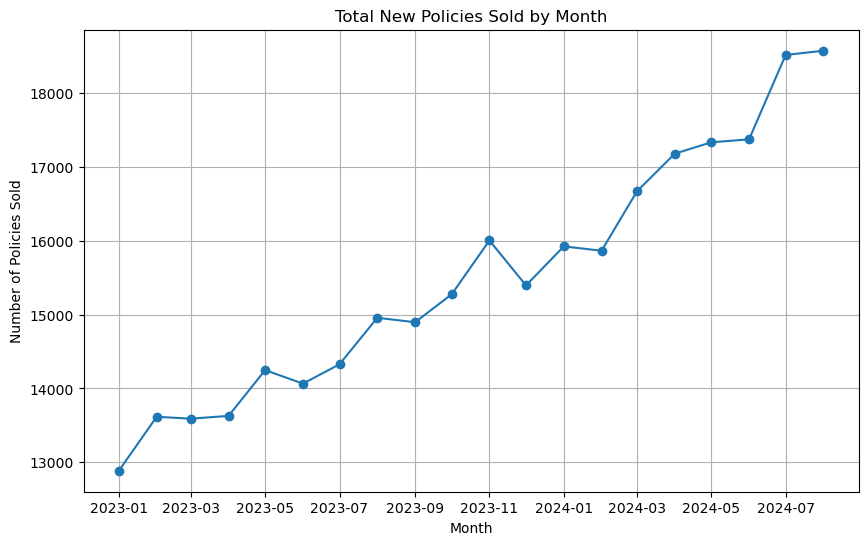

In [39]:
#Time Series Visualization
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['year_month'], monthly_sales['new_policy_count'], marker='o')
plt.title('Total New Policies Sold by Month')
plt.xlabel('Month')
plt.ylabel('Number of Policies Sold')
plt.grid(True)
plt.show()

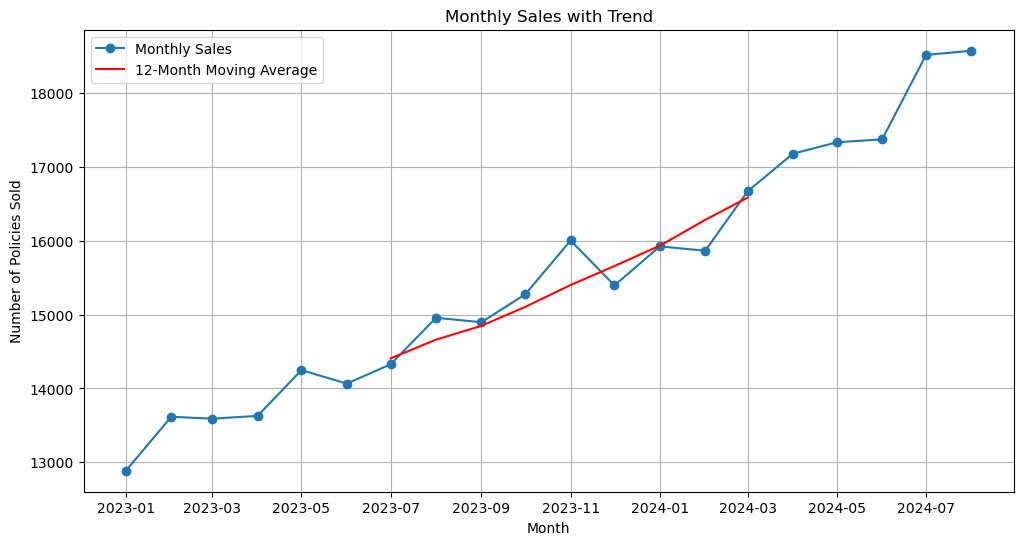

In [40]:
  #Calculating a Moving Average for Trend
  # Assuming 'monthly_sales' DataFrame with 'year_month' (datetime) and 'new_policy_count'

  # Calculate a 12-month moving average
  monthly_sales['trend'] = monthly_sales['new_policy_count'].rolling(window=12, center=True).mean()
  # window=12 for yearly seasonality; center=True to align the average in the middle

  plt.figure(figsize=(12, 6))
  plt.plot(monthly_sales['year_month'], monthly_sales['new_policy_count'], label='Monthly Sales', marker='o')
  plt.plot(monthly_sales['year_month'], monthly_sales['trend'], label='12-Month Moving Average', color='red')
  plt.title('Monthly Sales with Trend')
  plt.xlabel('Month')
  plt.ylabel('Number of Policies Sold')
  plt.legend()
  plt.grid(True)
  plt.show()

Seasonal Indices:
 month
1     0.928445
2     0.950070
3     0.975111
4     0.992771
5     1.017683
6     1.013075
7     1.058322
8     1.080430
9     0.960125
10    0.984424
11    1.031412
12    0.992223
Name: new_policy_count, dtype: float64


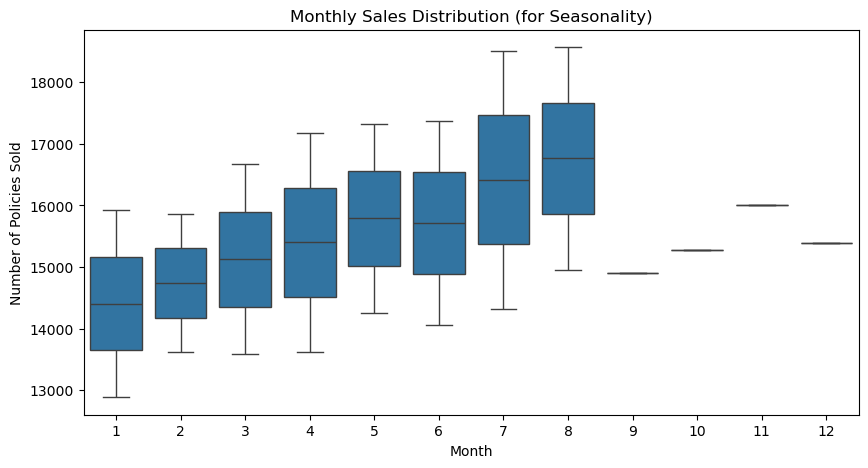

In [41]:
  #Calculating Seasonal Indices
  # Calculate the average sales for each month across all years
  monthly_sales['month'] = monthly_sales['year_month'].dt.month  # Extract the month number
  seasonal_means = monthly_sales.groupby('month')['new_policy_count'].mean()

  # Calculate the overall average sales
  overall_mean = monthly_sales['new_policy_count'].mean()

  # Calculate seasonal indices
  seasonal_indices = seasonal_means / overall_mean
  print("Seasonal Indices:\n", seasonal_indices)

  #Example: Add seasonal indices back to the original dataframe
  monthly_sales['seasonal_index'] = monthly_sales['month'].map(seasonal_indices)

  #Visualization (Boxplot)
  plt.figure(figsize=(10, 5))
  sns.boxplot(x=monthly_sales['month'], y=monthly_sales['new_policy_count'])
  plt.title('Monthly Sales Distribution (for Seasonality)')
  plt.xlabel('Month')
  plt.ylabel('Number of Policies Sold')
  plt.show()

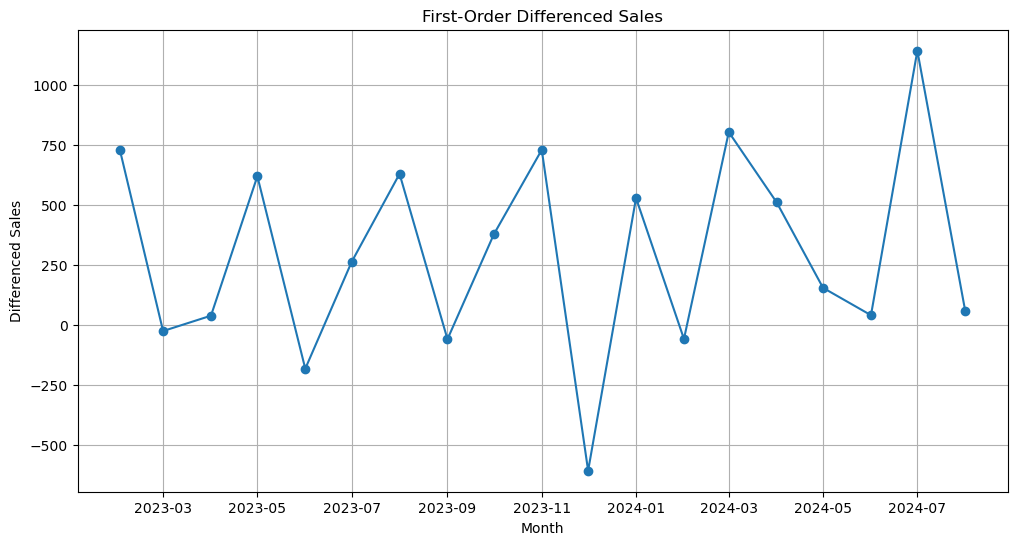

In [42]:
  #Simple Differencing for Trend Removal
  # First-order differencing
  monthly_sales['sales_diff'] = monthly_sales['new_policy_count'].diff()

  plt.figure(figsize=(12, 6))
  plt.plot(monthly_sales['year_month'], monthly_sales['sales_diff'], marker='o')
  plt.title('First-Order Differenced Sales')
  plt.xlabel('Month')
  plt.ylabel('Differenced Sales')
  plt.grid(True)
  plt.show()

# Correlation Analysis

In [43]:
#Calculate the Correlation Matrix:
numerical_cols = ['agent_age', 'new_policy_count', 'ANBP_value',
                    'unique_proposal', 'unique_quotations', 'unique_customers',
                    'number_of_policy_holders', 'number_of_cash_payment_policies', 'net_income']  # Add all relevant numerical columns
corr_matrix = data[numerical_cols].corr()
corr_matrix

agent_age  new_policy_count  ANBP_value  \
agent_age                         1.000000          0.003663   -0.000467   
new_policy_count                  0.003663          1.000000    0.602812   
ANBP_value                       -0.000467          0.602812    1.000000   
unique_proposal                  -0.002965          0.624904    0.376916   
unique_quotations                 0.005359          0.356495    0.225794   
unique_customers                  0.001389         -0.003896    0.003310   
number_of_policy_holders         -0.003387          0.006099    0.000560   
number_of_cash_payment_policies  -0.004036          0.279041    0.166760   
net_income                       -0.006067          0.287899    0.768814   

                                 unique_proposal  unique_quotations  \
agent_age                              -0.002965           0.005359   
new_policy_count                        0.624904           0.356495   
ANBP_value                              0.376916           0.225794   
unique_proposal                         1.000000           0.569796   
unique_quotations                       0.569796           1.000000   
unique_customers                       -0.005871           0.412415   
number_of_policy_holders                0.004466           0.159845   
number_of_cash_payment_policies         0.397512           0.227017   
net_income                              0.388590           0.226872   

                                 unique_customers  number_of_policy_holders  \
agent_age                                0.001389                 -0.003387   
new_policy_count                        -0.003896                  0.006099   
ANBP_value                               0.003310                  0.000560   
unique_proposal                         -0.005871                  0.004466   
unique_quotations                        0.412415                  0.159845   
unique_customers                         1.000000                  0.369675   
number_of_policy_holders                 0.369675                  1.000000   
number_of_cash_payment_policies         -0.000435                  0.007612   
net_income                               0.001209                 -0.004712   

                                 number_of_cash_payment_policies  net_income  
agent_age                                              -0.004036   -0.006067  
new_policy_count                                        0.279041    0.287899  
ANBP_value                                              0.166760    0.768814  
unique_proposal                                         0.397512    0.388590  
unique_quotations                                       0.227017    0.226872  
unique_customers                                       -0.000435    0.001209  
number_of_policy_holders                                0.007612   -0.004712  
number_of_cash_payment_policies                         1.000000    0.171220  
net_income                                              0.171220    1.000000

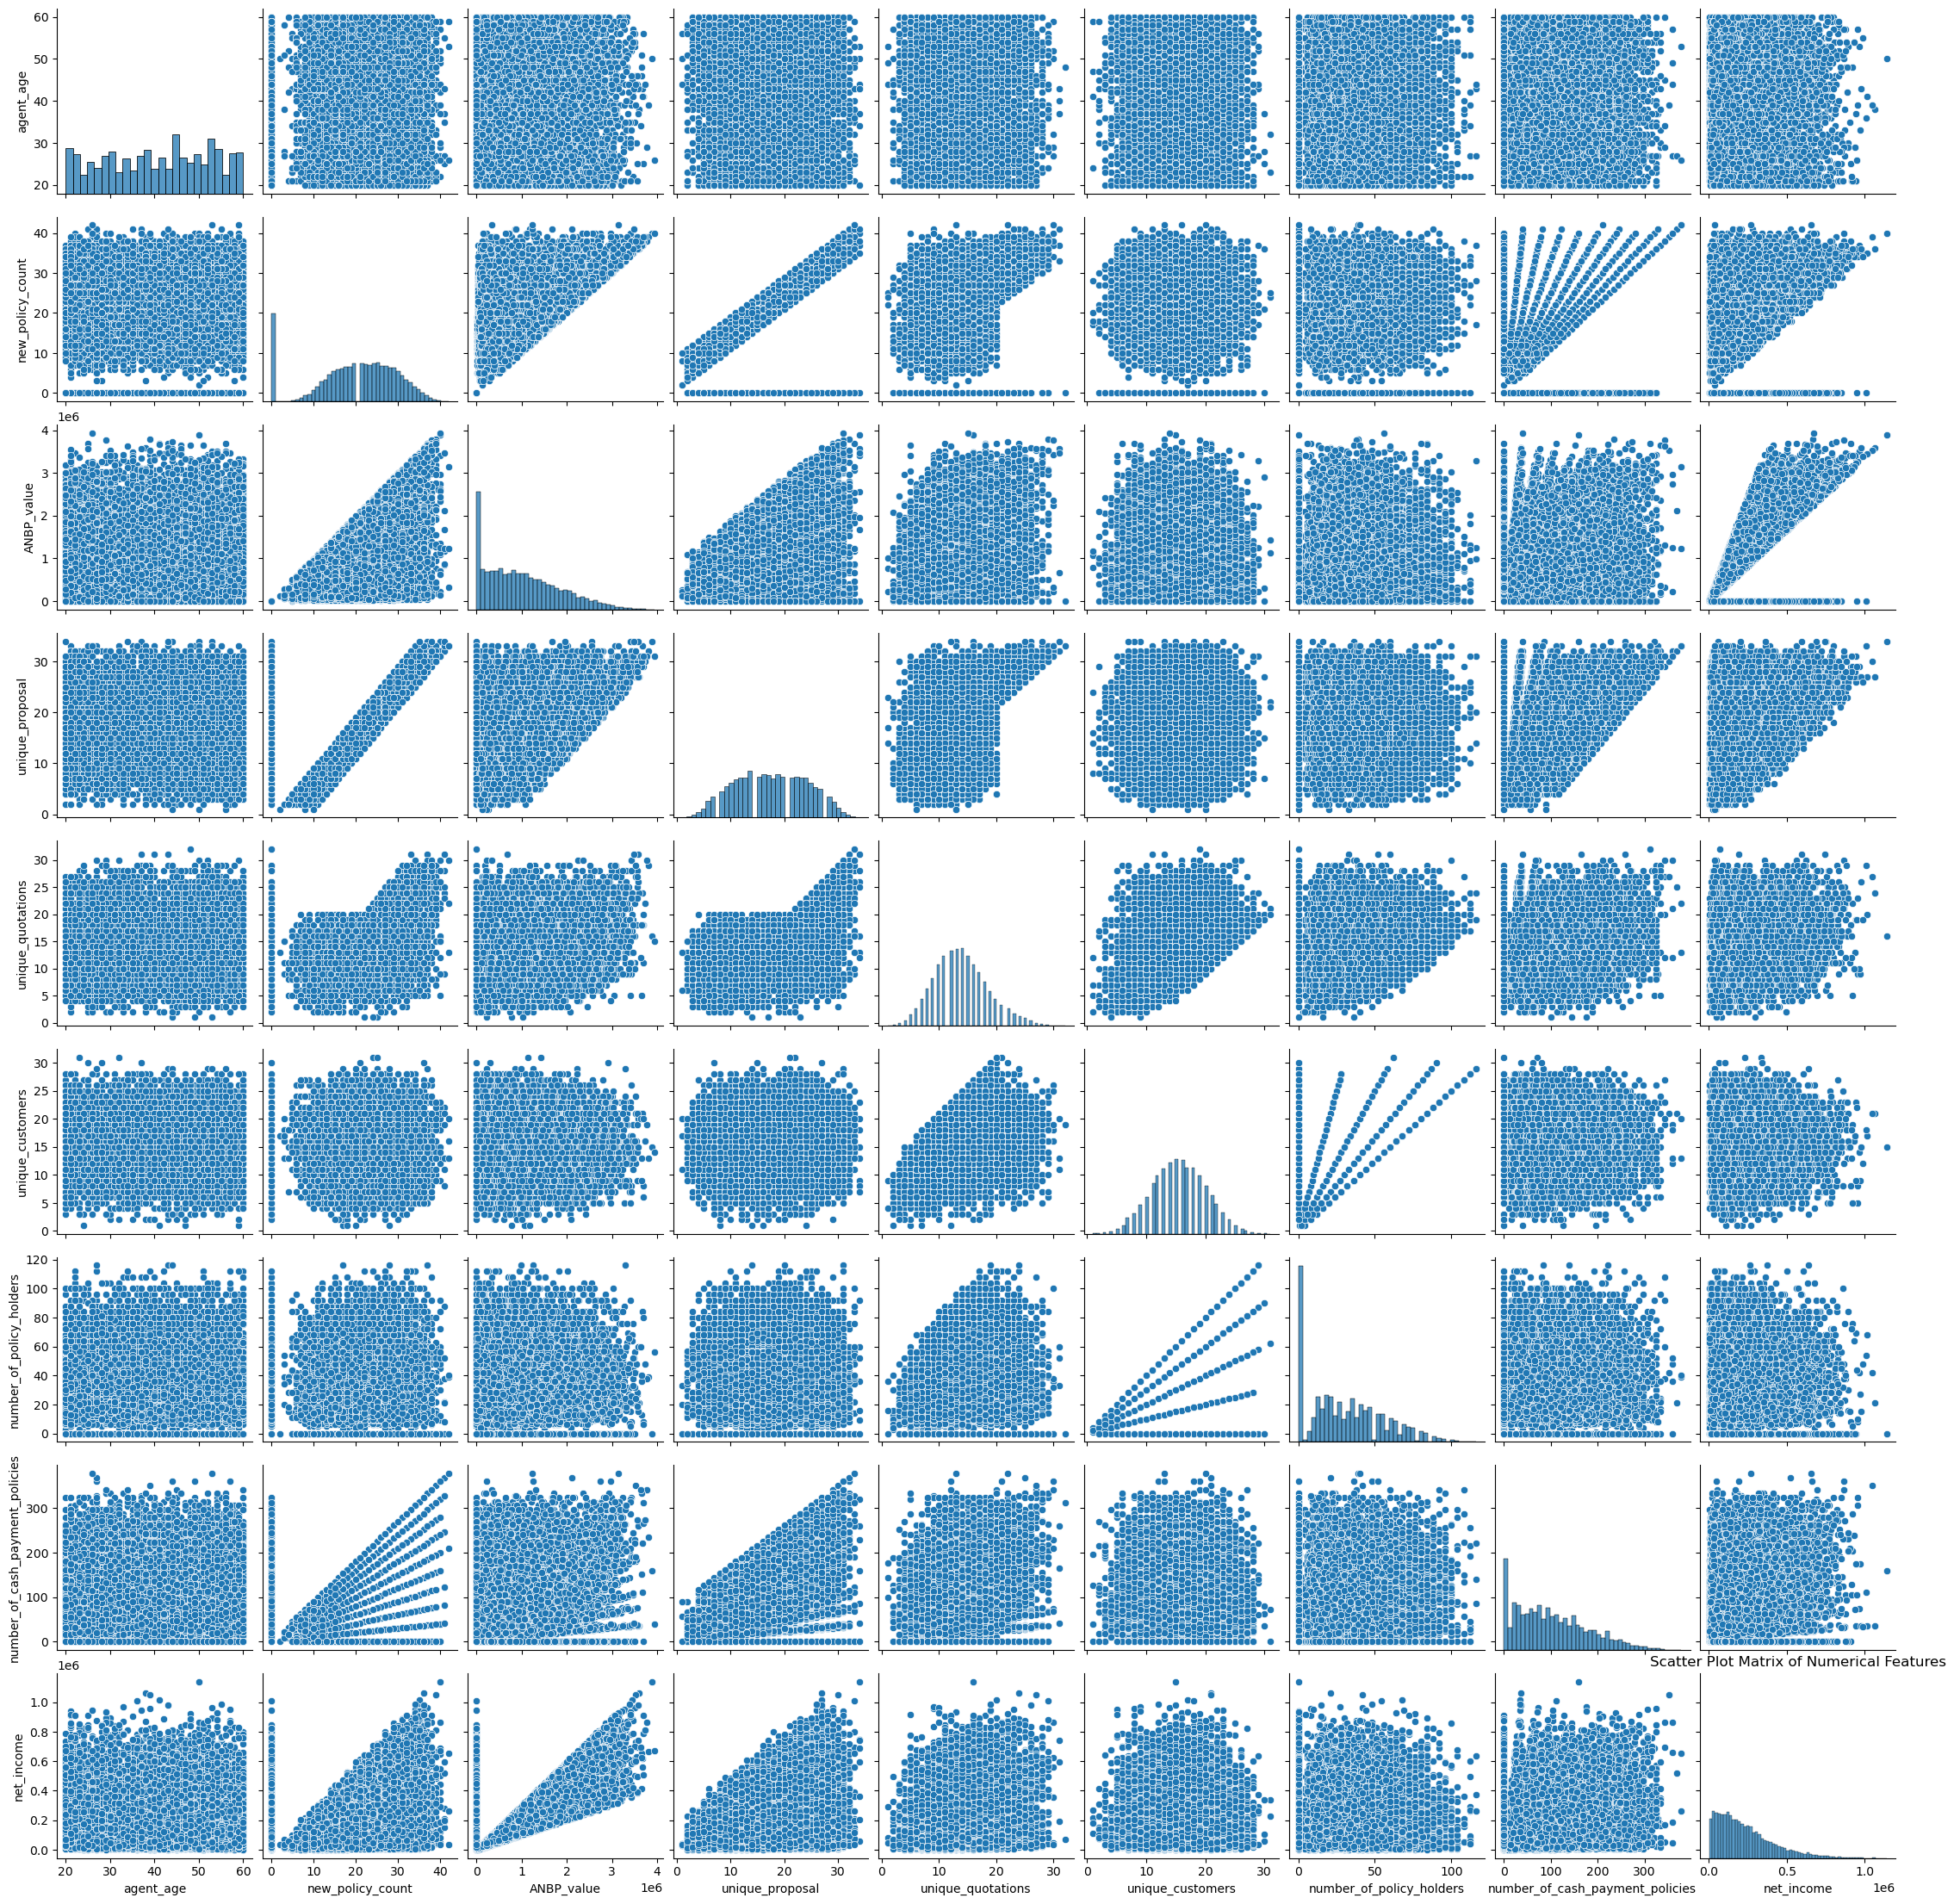

In [44]:
#Scatter Plot Matrix
sns.pairplot(data[numerical_cols])
plt.title('Scatter Plot Matrix of Numerical Features')  # Add a title
plt.show()

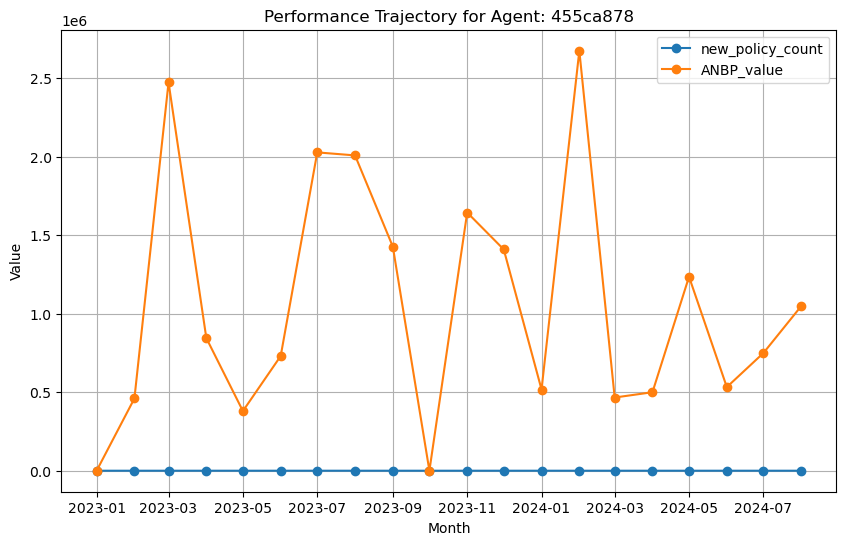

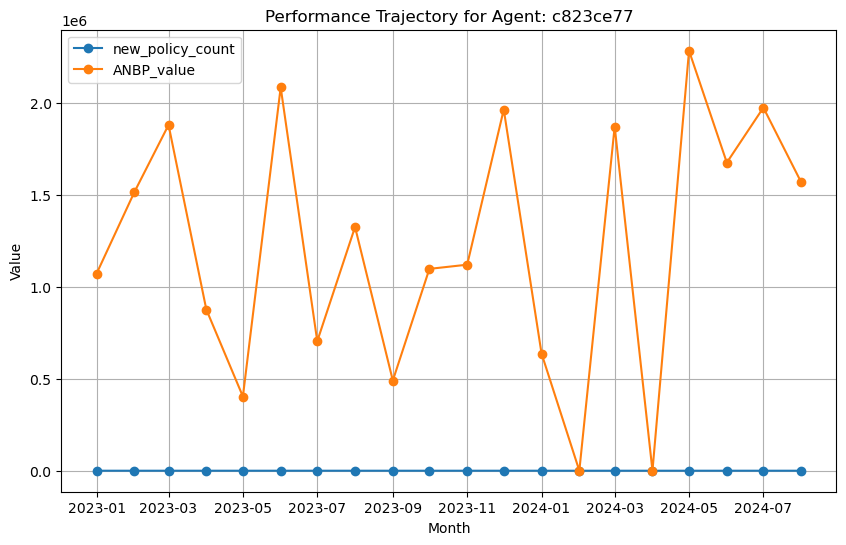

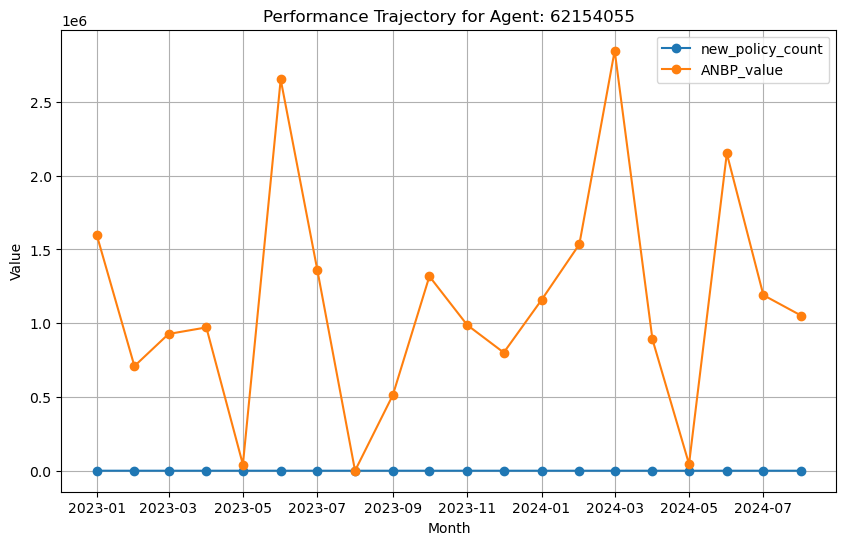

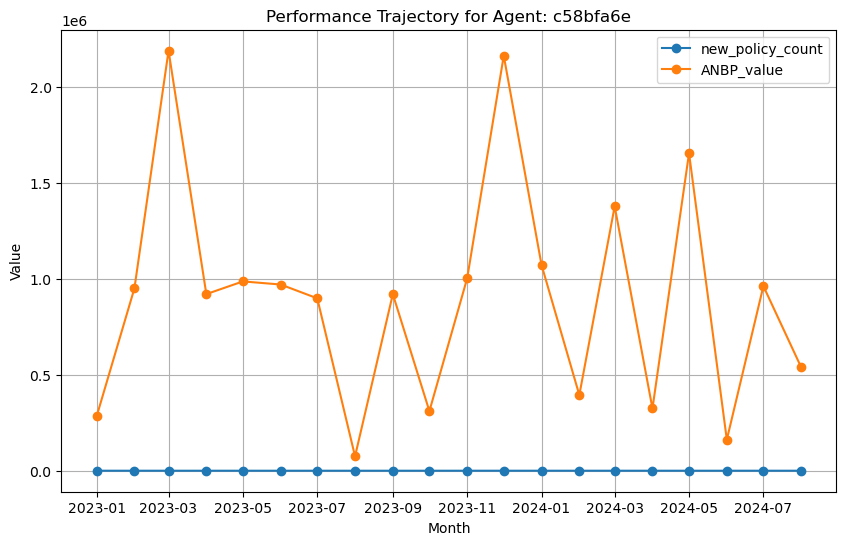

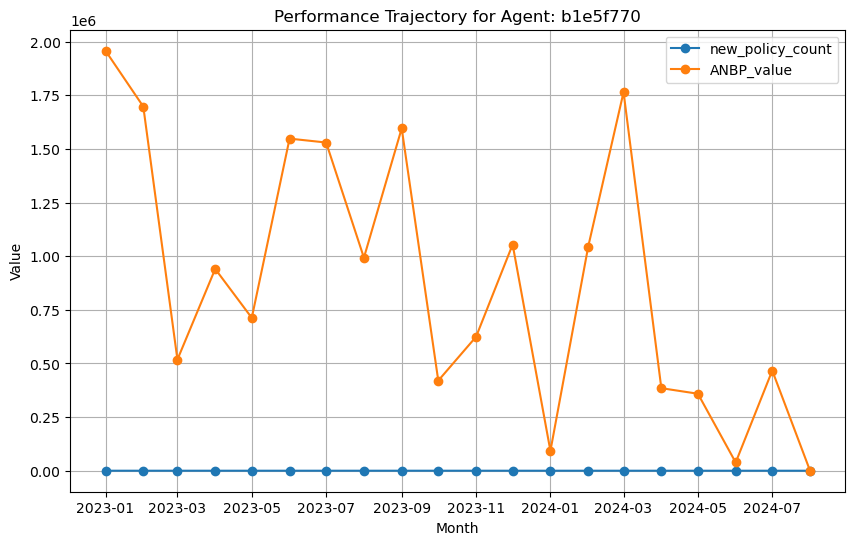

In [45]:
# Assuming your DataFrame is 'data' and 'year_month' is datetime

unique_agents = data['agent_code'].unique()
performance_metrics = ['new_policy_count', 'ANBP_value'] # Choose your KPIs

for agent in unique_agents[0:5]:
    agent_data = data[data['agent_code'] == agent].sort_values(by='year_month')

    plt.figure(figsize=(10, 6))
    plt.title(f'Performance Trajectory for Agent: {agent}')
    plt.xlabel('Month')
    plt.ylabel('Value')
    plt.grid(True)

    for metric in performance_metrics:
        plt.plot(agent_data['year_month'], agent_data[metric], marker='o', label=metric)

    plt.legend()
    plt.show()

In [46]:
# y=data['new_policy_count']

In [48]:
# Group data by agent and month
agent_monthly_sales = data.groupby(['agent_code', 'year_month'])['new_policy_count'].sum().reset_index()
agent_sales = data.groupby(['agent_code'])['new_policy_count'].sum().reset_index()
# For each agent, find their first sale month
first_sale_month = data.groupby('agent_code')['first_policy_sold_month'].min()

In [49]:
agent_monthly_sales

agent_code year_month  new_policy_count
0       003c1999 2023-01-01                 0
1       003c1999 2023-02-01                31
2       003c1999 2023-03-01                27
3       003c1999 2023-04-01                22
4       003c1999 2023-05-01                20
...          ...        ...               ...
14398   fffb525d 2024-03-01                20
14399   fffb525d 2024-04-01                25
14400   fffb525d 2024-05-01                29
14401   fffb525d 2024-06-01                 0
14402   fffb525d 2024-07-01                33

[14403 rows x 3 columns]

In [50]:
agent_sales

agent_code  new_policy_count
0     003c1999               429
1     00d5bda3               405
2     012a3553               334
3     012f0e15               356
4     0177ed5f               398
..         ...               ...
887   ff8edcc9               412
888   ff955d18                26
889   ffca3177               382
890   ffe6c9e9               374
891   fffb525d               376

[892 rows x 2 columns]

In [51]:
first_sale_month

agent_code
003c1999   2022-12-01
00d5bda3   2023-03-01
012a3553   2023-10-01
012f0e15   2024-04-01
0177ed5f   2023-08-01
              ...    
ff8edcc9   2023-04-01
ff955d18   2024-04-01
ffca3177   2022-05-01
ffe6c9e9   2023-11-01
fffb525d   2023-11-01
Name: first_policy_sold_month, Length: 892, dtype: datetime64[ns]

In [52]:
# Sort data by agent and month
data = data.sort_values(by=['agent_code', 'year_month'])

# Shift new_policy_count by -1 to get next month's value per agent
data['next_month_policy_count'] = data.groupby('agent_code')['new_policy_count'].shift(-1)

# Binary target: 1 if next month is NILL, else 0
data['is_nill_next_month'] = (data['next_month_policy_count'] == 0).astype(int)


In [53]:
data

agent_code  agent_age agent_join_month first_policy_sold_month  \
0       003c1999         35       2020-08-01              2022-12-01   
1       003c1999         35       2020-08-01              2022-12-01   
2       003c1999         35       2020-08-01              2022-12-01   
3       003c1999         35       2020-08-01              2022-12-01   
4       003c1999         35       2020-08-01              2022-12-01   
...          ...        ...              ...                     ...   
15302   fffb525d         32       2020-03-01              2023-11-01   
15303   fffb525d         32       2020-03-01              2023-11-01   
15304   fffb525d         32       2020-03-01              2023-11-01   
15305   fffb525d         32       2020-03-01              2023-11-01   
15306   fffb525d         32       2020-03-01              2023-11-01   

      year_month  unique_proposals_last_7_days  unique_proposals_last_15_days  \
0     2023-01-01                             2                              2   
1     2023-02-01                             3                              2   
2     2023-03-01                             0                              2   
3     2023-04-01                             2                              6   
4     2023-05-01                             3                              3   
...          ...                           ...                            ...   
15302 2024-03-01                             3                              2   
15303 2024-04-01                             2                              6   
15304 2024-05-01                             0                              6   
15305 2024-06-01                             2                              6   
15306 2024-07-01                             1                              1   

       unique_proposals_last_21_days  unique_proposal  \
0                                  0                8   
1                                 20               30   
2                                 19               23   
3                                 11               21   
4                                  7               15   
...                              ...              ...   
15302                              7               15   
15303                              7               17   
15304                             12               23   
15305                              5               14   
15306                             20               27   

       unique_quotations_last_7_days  unique_quotations_last_15_days  \
0                                  0                               0   
1                                  0                               2   
2                                  2                               1   
3                                  3                               5   
4                                  4                               4   
...                              ...                             ...   
15302                              3                               6   
15303                              1                               6   
15304                              0                               4   
15305                              1                               6   
15306                              0                               1   

       unique_quotations_last_21_days  unique_quotations  \
0                                   0                  2   
1                                   6                 14   
2                                   7                 19   
3                                   7                 19   
4                                   5                 14   
...                               ...                ...   
15302                               3                 13   
15303                               9                 17   
15304                               4                 21   
15305             

In [54]:
features = [
    'agent_age',
    'unique_proposals_last_7_days',
    'unique_quotations_last_15_days',
    'unique_customers_last_21_days',
    'ANBP_value',
    'net_income',
    'number_of_policy_holders',
    'number_of_cash_payment_policies',
    'new_policy_count'
]
X = data[features]
y = data['is_nill_next_month']


In [55]:
X = data[[
    'agent_age',
    'unique_proposals_last_7_days',
    'unique_proposals_last_15_days',
    'unique_proposals_last_21_days',
    'unique_proposal',
    'unique_quotations_last_7_days',
    'unique_quotations_last_15_days',
    'unique_quotations_last_21_days',
    'unique_quotations',
    'unique_customers_last_7_days',
    'unique_customers_last_15_days',
    'unique_customers_last_21_days',
    'unique_customers',
    'new_policy_count',
    'ANBP_value',
    'net_income',
    'number_of_policy_holders',
    'number_of_cash_payment_policies'
]]


In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2612
           1       0.00      0.00      0.00       269

    accuracy                           0.91      2881
   macro avg       0.45      0.50      0.48      2881
weighted avg       0.82      0.91      0.86      2881



<Axes: >

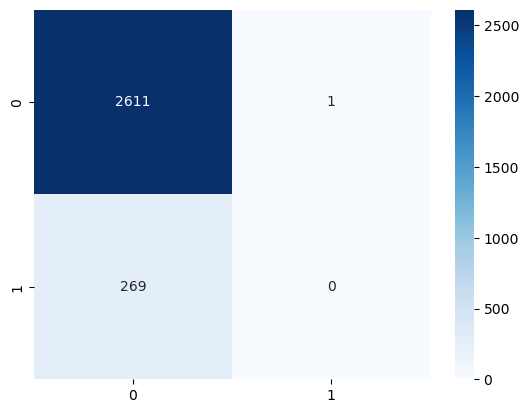

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')


In [58]:
importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
importances.plot(kind='bar')
plt.title("Feature Importances for Predicting NILL Agents")
plt.show()


ValueError: Length of values (18) does not match length of index (9)

Accuracy: 0.9063

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2775
           1       0.00      0.00      0.00       287

    accuracy                           0.91      3062
   macro avg       0.45      0.50      0.48      3062
weighted avg       0.82      0.91      0.86      3062



D:\myprogramming1\Python\CondaEnvs\test4\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\myprogramming1\Python\CondaEnvs\test4\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\myprogramming1\Python\CondaEnvs\test4\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

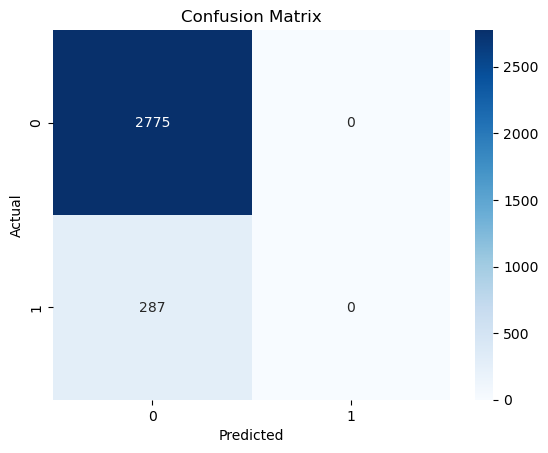

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on test set
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Additional Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
